In [1]:
#folder = 'plots_for_DPS/'
folder = 'plots/'
doPAS = False

['4', '881.033', '9', '670', '1424', '21', '2331', '8', '2', '4401', '4582', '4907', '5733']
4
['4', '124.367', '7', '540', '13032', '57', '18485', '17', '1', '31170', '33946', '36665', '56763']
4
['4', '1577.6', '13', '811', '3357', '27', '5851', '7', '2', '10036', '10150', '10202', '10798']
4
['4', '211.333', '14', '596', '29915', '79', '45045', '28', '1', '74490', '79405', '84645', '94677']
4
['4', '1816.53', '18', '870', '6105', '40', '10494', '7', '2', '17518', '17632', '17678', '17756']
4
['4', '237.067', '29', '1055', '52332', '131', '80972', '38', '2', '131396', '148457', '152320', '164663']
4
['4', '2011.2', '25', '1049', '11324', '60', '19283', '8', '2', '31726', '31845', '31947', '32452']
4
['4', '260.267', '53', '1057', '93998', '198', '150687', '43', '2', '239928', '269559', '276233', '296251']
4
['4', '2140.8', '51', '1386', '21456', '104', '36717', '8', '2', '59692', '59964', '60024', '60168']
4
['4', '257.067', '92', '769', '185060', '580', '307168', '71', '3', '490943'

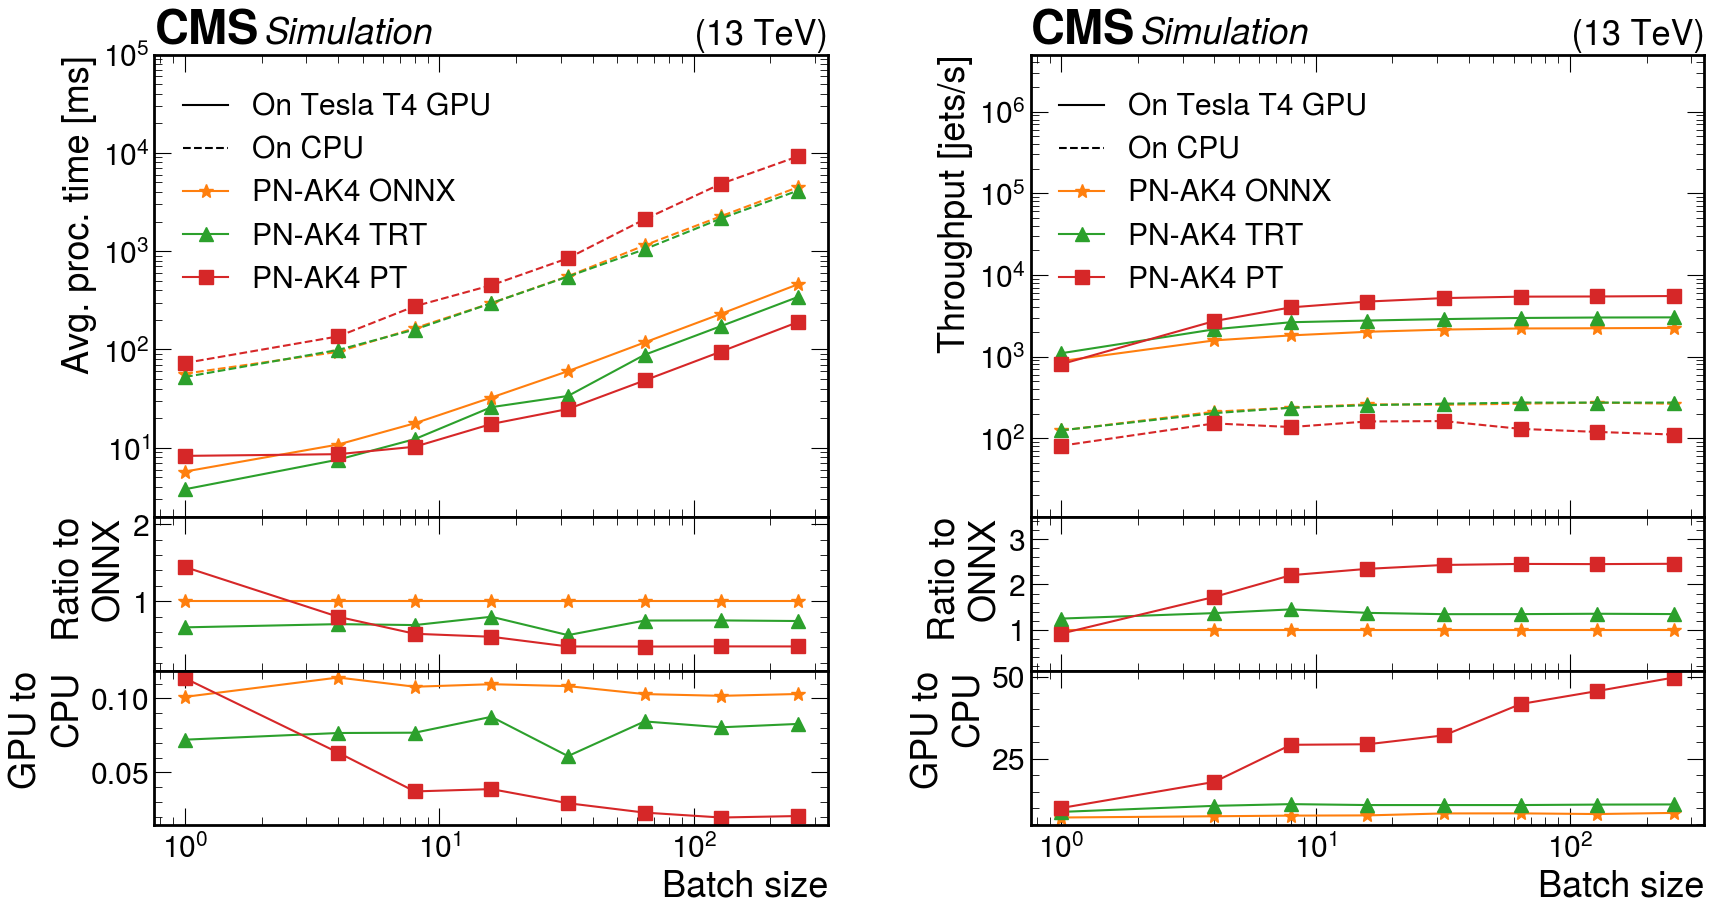

In [2]:
import csv
import os
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
# plotting style
import mplhep as hep
plt.style.use(hep.style.CMS)



throughputs = OrderedDict()
latencys = OrderedDict()

for model in ['particlenet_AK4', 'particlenet_AK4_PT', 'particlenet_AK4_TRT']:
    dirname = f'./explicit_model_file_location/{model}'
    if not os.path.isdir(dirname):
        continue
    throughputs[model] = OrderedDict()
    latencys[model] = OrderedDict()
    throughputs[model+"_CPU"] = OrderedDict()
    latencys[model+"_CPU"] = OrderedDict()

    for batch in [1, 4, 8, 16, 32, 64, 128, 256]:
        fname = f'{dirname}/{model}_batch{batch}.csv'
        #fname = f'{dirname}_CPU_CPU/{model}_batch{batch}.csv'
        if not os.path.isfile(fname):
            continue
        with open (fname, newline='') as csvfile:
            datareader = csv.reader(csvfile)
            for i, row in enumerate(datareader):
                if i!=1:
                    continue
                print(row)
                print(row[0])
            throughputs[model][batch] = float(row[1])
            latencys[model][batch] = float(row[-1])/1.0e3
            
        #fname = f'{dirname}/{model}_batch{batch}.csv'
        fname = f'{dirname}_CPU_CPU/{model}_batch{batch}.csv'
        if not os.path.isfile(fname):
            continue
        with open (fname, newline='') as csvfile:
            datareader = csv.reader(csvfile)
            for i, row in enumerate(datareader):
                if i!=1:
                    continue
                print(row)
                print(row[0])
            throughputs[model+"_CPU"][batch] = float(row[1])
            latencys[model+"_CPU"][batch] = float(row[-1])/1.0e3

labels = {
    'particlenet_AK4': 'PN-AK4 ONNX',
    'particlenet_AK4_PT': 'PN-AK4 PT',
    'particlenet_AK4_TRT': 'PN-AK4 TRT',
    'particlenet_AK4_CPU': 'PN-AK4 ONNX CPU',
    'particlenet_AK4_PT_CPU': 'PN-AK4 PT CPU',
    'particlenet_AK4_TRT_CPU': 'PN-AK4 TRT CPU',
}

markers = ['*', '^', 's', '1']
markers = ['*', '^', 's', '*', '^', 's']
linestyles = ['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed']
linecolors = ['tab:orange', 'tab:green', 'tab:red', 'tab:orange', 'tab:green', 'tab:red']

# make some throughputs and latency plots
def Plot(models, outputname):
    if len(models) == 0:
        return
    model = models[0]
    batchs = np.array(list(throughputs[model].keys()), dtype=np.float32)

    vals_throughput = [np.array(list(throughputs[model].values())) for model in models]
    vals_latency = [np.array(list(latencys[model].values())) for model in models]

    legends = [(labels[model] if("CPU" not in model) else '') for model in models]

    fig, axs = plt.subplots(3,2, figsize=(20,10), gridspec_kw={'height_ratios': [3, 1,1]})
    #axs[0, 0].plot([], [], ' ', label="Tesla T4")
    #axs[0, 0].plot([], [], ' ', label=" ")
    #axs[1, 0].plot([], [], ' ', label="Tesla T4")
    #axs[0, 1].plot([], [], ' ', label="Tesla T4")
    #axs[1, 1].plot([], [], ' ', label="Tesla T4")

    axs[0, 0].plot([], [], label='On Tesla T4 GPU', color = 'k', linestyle = 'solid')
    axs[0, 0].plot([], [], label='On CPU', color = 'k', linestyle = 'dashed')
    axs[0, 1].plot([], [], label='On Tesla T4 GPU', color = 'k', linestyle = 'solid')
    axs[0, 1].plot([], [], label='On CPU', color = 'k', linestyle = 'dashed')   
    
    for i, model in enumerate(models):
        axs[0, 0].plot(batchs, vals_latency[i], label=legends[i], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)
        axs[0, 1].plot(batchs, vals_throughput[i],    label=legends[i], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)

    for i, model in enumerate(models):
        axs[1, 0].plot(batchs, vals_latency[i]/vals_latency[0], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)
        axs[1, 1].plot(batchs, vals_throughput[i]/vals_throughput[0], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)
        if(i > 1):
            break
        
    for i, model in enumerate(models):
        axs[2, 0].plot(batchs, vals_latency[i]/vals_latency[i+3], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)
        axs[2, 1].plot(batchs, vals_throughput[i]/vals_throughput[i+3], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)
        if(i > 1):
            break

    axs[2, 0].set_xlabel('Batch size')
    axs[2, 0].set_ylabel('GPU to\nCPU')
    axs[1, 0].set_ylabel('Ratio to\nONNX')
    axs[1, 0].set_xscale('log')
    axs[0, 0].set_ylabel('Avg. proc. time [ms]')
    axs[0, 0].set_ylim(2,1e5)
    axs[1, 0].set_ylim(0.1,2.1)
    axs[0, 0].set_yscale('log')
    axs[0, 0].set_xticklabels([])
    axs[1, 0].set_xticklabels([])
    axs[0, 0].set_xscale('log')
    #axs[0, 0].text(1, 5000, 'Solid line: Tesla T4; Dashed line: CPU', fontsize = 22)
    #axs[0, 0].legend()
    axs[0, 0].legend(loc=[.02,.45])
    axs[2, 0].set_xscale('log')


    axs[2, 1].set_xlabel('Batch size')
    axs[0, 1].set_ylim(1.1e1,5.0e6)
    axs[1, 1].set_ylim(0.1,3.5)
    axs[2, 1].set_ylabel('GPU to\nCPU')
    axs[1, 1].set_ylabel('Ratio to\nONNX')
    axs[1, 1].set_xscale('log')
    axs[0, 1].set_ylabel('Throughput [jets/s]')
    axs[0, 1].set_yscale('log')
    axs[0, 1].set_xticklabels([])
    axs[1, 1].set_xticklabels([])
    axs[0, 1].set_xscale('log')
    axs[0, 1].legend(loc=[.02,.45])
    axs[2, 1].set_xscale('log')


    #hep.cms.label(label='Simulation', loc=0)
    if doPAS:
        hep.cms.label(label='Preliminary', loc=0, ax=axs[0,0])
        hep.cms.label(label='Preliminary', loc=0, ax=axs[0,1])
    else:
        hep.cms.label(loc=0, ax=axs[0,0])
        hep.cms.label(loc=0, ax=axs[0,1])
    #hep.cms.lumitext(text='Simulation', ax=None, fontname=None, fontsize=None)
    
    fig.subplots_adjust(hspace=0,wspace=0.3)
    fig.savefig(folder+f"{outputname}.png")
    fig.savefig(folder+f"{outputname}.pdf")
Plot(['particlenet_AK4', 'particlenet_AK4_TRT', 'particlenet_AK4_PT', 'particlenet_AK4_CPU', 'particlenet_AK4_TRT_CPU', 'particlenet_AK4_PT_CPU'], 'latencies_throughputs_pn')
#Plot(['particlenet_AK4', 'particlenet_AK4_PT'], 'Test')

OrderedDict([('deepmet', OrderedDict([(1, 1321.9), (2, 2160.6), (4, 3747.6), (8, 4583.2), (16, 4670.4), (32, 4694.4), (64, 4563.2), (128, 4352.0), (256, 4428.8)])), ('deepmet_CPU', OrderedDict([(1, 592.9), (2, 757.4), (4, 1004.4), (8, 1207.2), (16, 1294.4), (32, 1337.6), (64, 1292.8), (128, 1139.2), (256, 1024.0)])), ('deepmet_trt', OrderedDict([(1, 507.9), (2, 927.4), (4, 1536.0), (8, 2229.6), (16, 2609.6), (32, 3001.6), (64, 2956.8), (128, 3392.0), (256, 3072.0)])), ('deepmet_trt_CPU', OrderedDict([(1, 405.6), (2, 531.4), (4, 822.8), (8, 953.6), (16, 1068.8), (32, 1139.2), (64, 1190.4), (128, 1228.8), (256, 1075.2)]))])


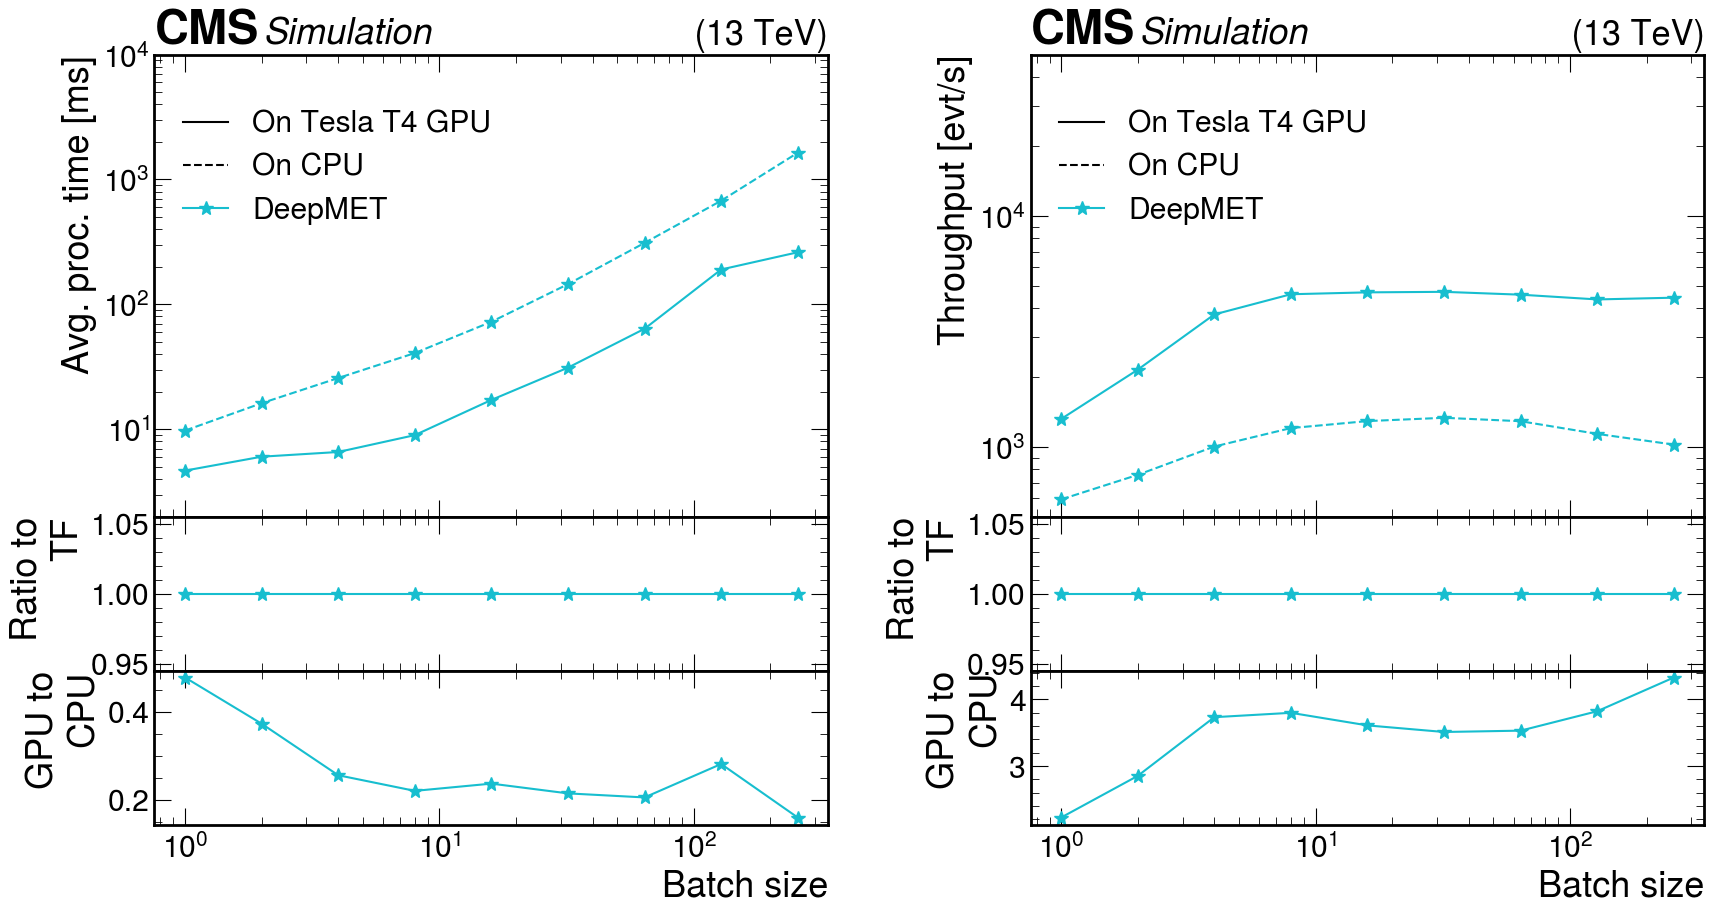

In [40]:
throughputs = OrderedDict()
latencys = OrderedDict()

for model in ['deepmet', 'deepmet_trt']:
    dirname = f'./explicit_model_file_location/{model}'
    if not os.path.isdir(dirname):
        continue
    throughputs[model] = OrderedDict()
    latencys[model] = OrderedDict()
    throughputs[model+"_CPU"] = OrderedDict()
    latencys[model+"_CPU"] = OrderedDict()

    for batch in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
        fname = f'{dirname}/{model}_batch{batch}.csv'
        #fname = f'{dirname}_CPU_CPU/{model}_batch{batch}.csv'
        if not os.path.isfile(fname):
            continue
        with open (fname, newline='') as csvfile:
            datareader = csv.reader(csvfile)
            for i, row in enumerate(datareader):
                if i!=1:
                    continue
                #print(row)
                #print(row[0])
            throughputs[model][batch] = float(row[1])
            latencys[model][batch] = float(row[-1])/1.0e3
            
        #fname = f'{dirname}/{model}_batch{batch}.csv'
        fname = f'{dirname}_CPU/{model}_batch{batch}.csv'
        if not os.path.isfile(fname):
            continue
        with open (fname, newline='') as csvfile:
            datareader = csv.reader(csvfile)
            for i, row in enumerate(datareader):
                if i!=1:
                    continue
                #print(row)
                #print(row[0])
            throughputs[model+"_CPU"][batch] = float(row[1])
            latencys[model+"_CPU"][batch] = float(row[-1])/1.0e3

print(throughputs)

labels = {
    'deepmet': 'DeepMET',
    'deepmet_trt': 'DeepMET TRT',
}

markers = ['*', '^', 's', '1']
markers = ['*', '*', '^', 's', '*', '^', 's']
linestyles = ['solid', 'dashed', 'solid', 'dashed', 'dashed', 'dashed']
linecolors = ['tab:cyan', 'tab:cyan', 'tab:red', 'tab:orange', 'tab:green', 'tab:red']

# make some throughputs and latency plots
def Plot(models, outputname):
    if len(models) == 0:
        return
    model = models[0]
    batchs = np.array(list(throughputs[model].keys()), dtype=np.float32)

    vals_throughput = [np.array(list(throughputs[model].values())) for model in models]
    vals_latency = [np.array(list(latencys[model].values())) for model in models]

    legends = [(labels[model] if("CPU" not in model) else '') for model in models]

    fig, axs = plt.subplots(3,2, figsize=(20,10), gridspec_kw={'height_ratios': [3, 1,1]})
    #axs[0, 0].plot([], [], ' ', label="Tesla T4")
    
    axs[0, 0].plot([], [], label='On Tesla T4 GPU', color = 'k', linestyle = 'solid')
    axs[0, 0].plot([], [], label='On CPU', color = 'k', linestyle = 'dashed')
    axs[0, 1].plot([], [], label='On Tesla T4 GPU', color = 'k', linestyle = 'solid')
    axs[0, 1].plot([], [], label='On CPU', color = 'k', linestyle = 'dashed')  

    for i, model in enumerate(models):
        axs[0, 0].plot(batchs, vals_latency[i], label=legends[i], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)
        axs[0, 1].plot(batchs, vals_throughput[i],    label=legends[i], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)
        #axs[0, 0].plot(batchs, vals_latency[i], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)
        #axs[0, 1].plot(batchs, vals_throughput[i],  color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)

    for i, model in enumerate(models):
        if i>0:
            break
        axs[1, 0].plot(batchs, vals_latency[i]/vals_latency[0], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)
        axs[1, 1].plot(batchs, vals_throughput[i]/vals_throughput[0], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)
    
    for i, model in enumerate(models):
        if(i > 0):
            break
        axs[2, 0].plot(batchs, vals_latency[i]/vals_latency[i+1], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)
        axs[2, 1].plot(batchs, vals_throughput[i]/vals_throughput[i+1], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)

    axs[2, 0].set_xlabel('Batch size')
    axs[1, 0].set_ylabel('Ratio to\nTF')
    axs[1, 0].set_xscale('log')
    axs[0, 0].set_ylim(2,1e4)
    axs[0, 0].set_ylabel('Avg. proc. time [ms]')
    axs[0, 0].set_yscale('log')
    axs[0, 0].set_xticklabels([])
    axs[0, 0].set_xscale('log')
    axs[2, 0].set_xscale('log')
    axs[2, 0].set_ylabel('GPU to\nCPU')
    #axs[0, 0].text(1, 300, 'Solid line: Tesla T4; Dashed line: CPU', fontsize = 22)
    axs[0, 0].legend(loc=[.02,.60])

    axs[2, 1].set_xlabel('Batch size')
    axs[1, 1].set_ylabel('Ratio to\nTF')
    axs[1, 1].set_xscale('log')
    axs[0, 1].set_ylim(500, 5e4)
    axs[0, 1].set_ylabel('Throughput [evt/s]')
    axs[0, 1].set_yscale('log')
    axs[0, 1].set_xticklabels([])
    axs[0, 1].set_xscale('log')
    axs[2, 1].set_xscale('log')
    axs[2, 1].set_ylabel('GPU to\nCPU')
    axs[0, 1].legend(loc=[.02,.60])

    #hep.cms.label(label='Simulation', loc=0)
    if doPAS:
        hep.cms.label(label='Preliminary', loc=0, ax=axs[0,0])
        hep.cms.label(label='Preliminary', loc=0, ax=axs[0,1])
    else:
        hep.cms.label(loc=0, ax=axs[0,0])
        hep.cms.label(loc=0, ax=axs[0,1])
    #hep.cms.lumitext(text='Simulation', ax=None, fontname=None, fontsize=None)
    
    fig.subplots_adjust(hspace=0,wspace=0.3)
    fig.savefig(folder+f"{outputname}.png")
    fig.savefig(folder+f"{outputname}.pdf")
Plot(['deepmet', 'deepmet_CPU'], 'latencies_throughputs_deepmet')

OrderedDict([('deeptau_nosplit', OrderedDict([(1, 354.0), (2, 602.2), (4, 1127.2), (8, 1306.4), (16, 1444.8), (32, 1433.6), (64, 1555.2), (128, 1561.6), (256, 1382.4)])), ('deeptau_nosplit_CPU', OrderedDict([(1, 170.4), (2, 240.0), (4, 346.0), (8, 467.2), (16, 617.6), (32, 697.6), (64, 678.4), (128, 652.8), (256, 486.4)])), ('deeptau_nosplit_trt', OrderedDict([(1, 619.7), (2, 1073.6), (4, 1488.8), (8, 1806.4), (16, 1940.8), (32, 2057.6), (64, 2105.6), (128, 1945.6), (256, 1792.0)])), ('deeptau_nosplit_trt_CPU', OrderedDict([(1, 167.7), (2, 245.4), (4, 376.8), (8, 471.2), (16, 614.4), (32, 672.0), (64, 499.2), (128, 409.6), (256, 665.6)]))])


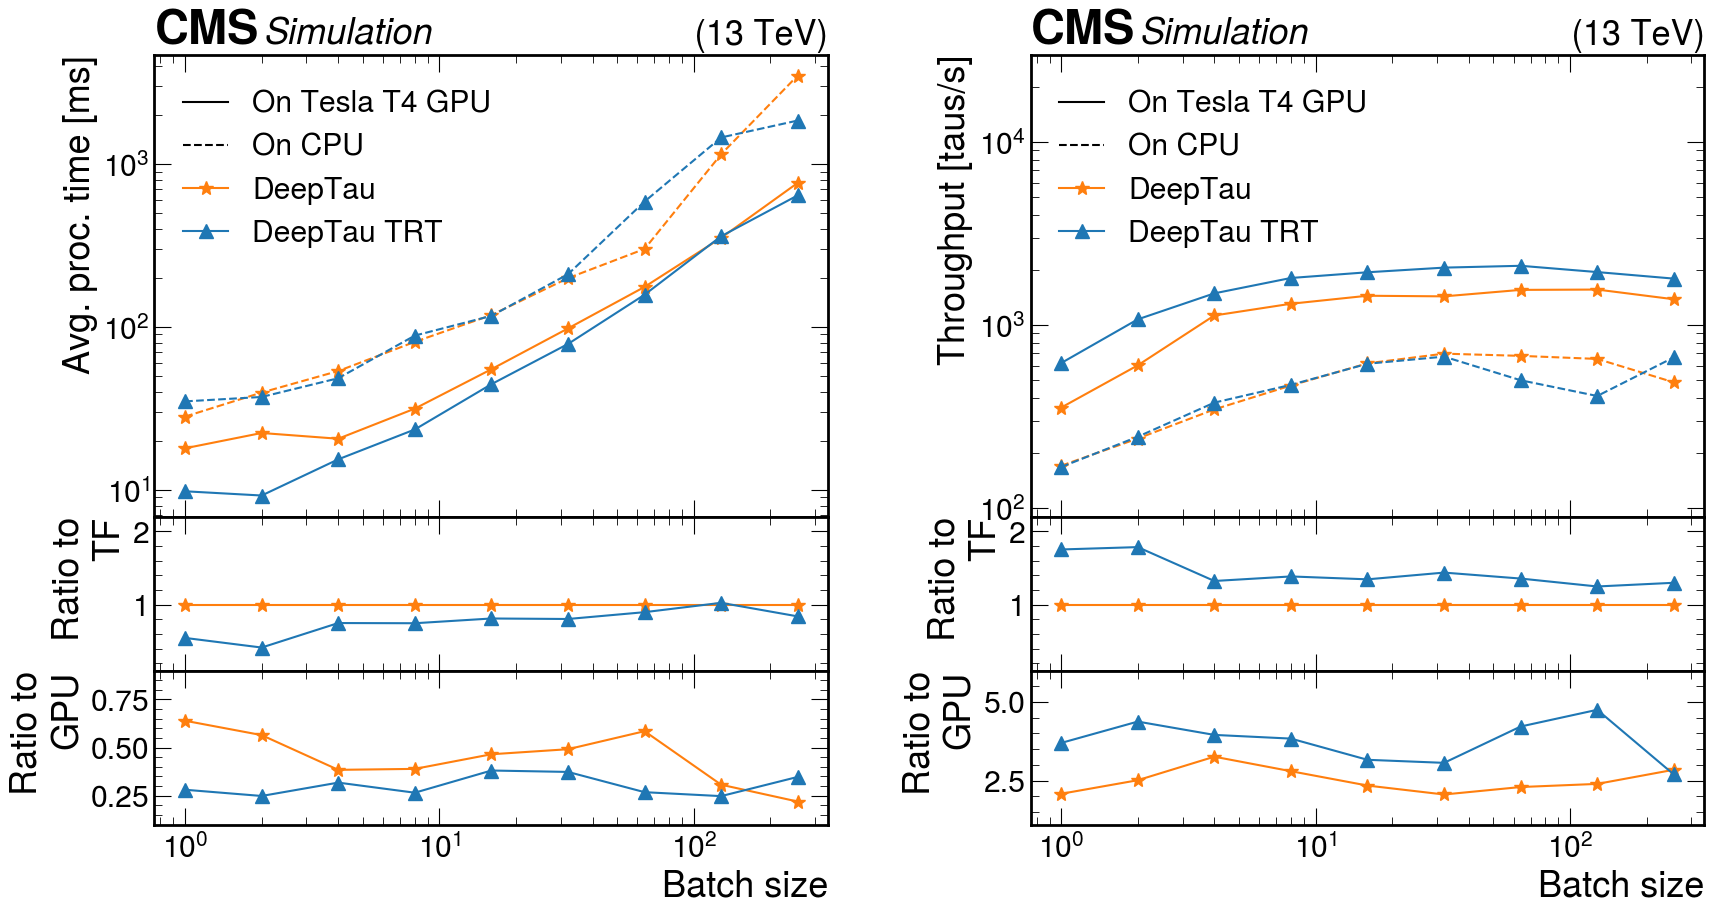

In [5]:
throughputs = OrderedDict()
latencys = OrderedDict()

for model in ['deeptau_nosplit', 'deeptau_nosplit_trt']:
    dirname = f'./explicit_model_file_location/{model}'
    if not os.path.isdir(dirname):
        continue
    throughputs[model] = OrderedDict()
    latencys[model] = OrderedDict()
    throughputs[model+"_CPU"] = OrderedDict()
    latencys[model+"_CPU"] = OrderedDict()

    for batch in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
        fname = f'{dirname}/{model}_batch{batch}.csv'
        #fname = f'{dirname}_CPU_CPU/{model}_batch{batch}.csv'
        if not os.path.isfile(fname):
            continue
        with open (fname, newline='') as csvfile:
            datareader = csv.reader(csvfile)
            for i, row in enumerate(datareader):
                if i!=1:
                    continue
                #print(row)
                #print(row[0])
            throughputs[model][batch] = float(row[1])
            latencys[model][batch] = float(row[-1])/1.0e3
            
        #fname = f'{dirname}/{model}_batch{batch}.csv'
        fname = f'{dirname}_CPU/{model}_batch{batch}.csv'
        if not os.path.isfile(fname):
            continue
        with open (fname, newline='') as csvfile:
            datareader = csv.reader(csvfile)
            for i, row in enumerate(datareader):
                if i!=1:
                    continue
                #print(row)
                #print(row[0])
            throughputs[model+"_CPU"][batch] = float(row[1])
            latencys[model+"_CPU"][batch] = float(row[-1])/1.0e3

print(throughputs)

labels = {
    'deeptau_nosplit': 'DeepTau',
    'deeptau_nosplit_trt': 'DeepTau TRT',
}

markers = ['*', '^', 's', '1']
markers = ['*', '^', '*', '^', 's', '*', '^', 's']
linestyles = ['solid', 'solid', 'dashed', 'dashed', 'dashed', 'dashed']
#linecolors = ['tab:cyan', 'tab:cyan', 'tab:green', 'tab:green', 'tab:green', 'tab:red']
linecolors = ['tab:orange', 'tab:blue', 'tab:orange', 'tab:blue', 'tab:green', 'tab:red']

# make some throughputs and latency plots
def Plot(models, outputname):
    if len(models) == 0:
        return
    model = models[0]
    batchs = np.array(list(throughputs[model].keys()), dtype=np.float32)

    vals_throughput = [np.array(list(throughputs[model].values())) for model in models]
    vals_latency = [np.array(list(latencys[model].values())) for model in models]

    legends = [(labels[model] if("CPU" not in model) else '') for model in models]

    fig, axs = plt.subplots(3,2, figsize=(20,10), gridspec_kw={'height_ratios': [3, 1,1]})

    axs[0, 0].plot([], [], label='On Tesla T4 GPU', color = 'k', linestyle = 'solid')
    axs[0, 0].plot([], [], label='On CPU', color = 'k', linestyle = 'dashed')
    
    axs[0, 1].plot([], [], label='On Tesla T4 GPU', color = 'k', linestyle = 'solid')
    axs[0, 1].plot([], [], label='On CPU', color = 'k', linestyle = 'dashed')
    
    for i, model in enumerate(models):
        axs[0, 0].plot(batchs, vals_latency[i], label=legends[i], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)
        axs[0, 1].plot(batchs, vals_throughput[i],    label=legends[i], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)

    for i, model in enumerate(models):
        if(i > 1):
            break
        axs[1, 0].plot(batchs, vals_latency[i]/vals_latency[0], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)
        axs[1, 1].plot(batchs, vals_throughput[i]/vals_throughput[0], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)

            
    for i, model in enumerate(models):
        if(i > 1):
            break
        axs[2, 0].plot(batchs, vals_latency[i]/vals_latency[i+2], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)
        axs[2, 1].plot(batchs, vals_throughput[i]/vals_throughput[i+2], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)

    axs[2, 0].set_xlabel('Batch size')
    axs[1, 0].set_ylabel('Ratio to\nTF')
    axs[2, 0].set_ylabel('Ratio to\nGPU')
    axs[1, 0].set_xscale('log')
    axs[0, 0].set_ylabel('Avg. proc. time [ms]')
    axs[0, 0].set_yscale('log')
    axs[0, 0].set_xticklabels([])
    axs[0, 0].set_xscale('log')
    axs[2, 0].set_xscale('log')
    axs[1, 0].set_ylim(0.1,2.2)
    axs[2, 0].set_ylim(0.1, 0.9)

    #axs[0, 0].text(1, 300, 'Solid line: Tesla T4; Dashed line: CPU', fontsize = 22)
    axs[0, 0].legend(loc=[.02,.55])

    axs[2, 1].set_xlabel('Batch size')
    axs[1, 1].set_ylabel('Ratio to\nTF')
    axs[2, 1].set_ylabel('Ratio to\nGPU')
    axs[1, 1].set_xscale('log')
    axs[0, 1].set_ylabel('Throughput [taus/s]')
    axs[0, 1].set_yscale('log')
    axs[0, 1].set_xticklabels([])
    axs[0, 1].set_xscale('log')
    axs[2, 1].set_xscale('log')
    axs[1, 1].set_ylim(0.1,2.2)
    axs[2, 1].set_ylim(1.1, 6.0)
    axs[0, 1].set_ylim(90, 3e4)
    axs[0, 1].legend(loc=[.02,.55])

    #hep.cms.label(label='Simulation', loc=0)
    if doPAS:
        hep.cms.label(label='Preliminary', loc=0, ax=axs[0,0])
        hep.cms.label(label='Preliminary', loc=0, ax=axs[0,1])
    else:
        hep.cms.label(loc=0, ax=axs[0,0])
        hep.cms.label(loc=0, ax=axs[0,1])
    #hep.cms.lumitext(text='Simulation', ax=None, fontname=None, fontsize=None)
    
    fig.subplots_adjust(hspace=0,wspace=0.3)
    fig.savefig(folder+f"{outputname}.png")
    fig.savefig(folder+f"{outputname}.pdf")
Plot(['deeptau_nosplit', 'deeptau_nosplit_trt', 'deeptau_nosplit_CPU', 'deeptau_nosplit_trt_CPU'], 'latencies_throughputs_deeptau')
#Plot(['particlenet_AK4', 'particlenet_AK4_PT'], 'Test')

['4', '534.7', '7', '767', '2407', '17', '4207', '8', '2', '7376', '7514', '7711', '9145']
4
['4', '80.125', '8', '613', '19714', '55', '29377', '25', '1', '49763', '51593', '52002', '54503']
4
['4', '762.667', '13', '818', '7438', '23', '12595', '7', '2', '20880', '21028', '21083', '21200']
4
['4', '104', '26', '1248', '59298', '89', '92886', '35', '2', '153979', '157942', '158414', '159277']
4
['4', '824.533', '18', '952', '14119', '45', '23609', '8', '2', '38673', '39094', '39193', '39487']
4
['4', '116', '35', '1207', '106706', '126', '172845', '29', '3', '281699', '290109', '291797', '292008']
4
['4', '866.133', '34', '1166', '27041', '71', '45478', '8', '2', '73745', '74256', '74387', '74646']
4
['4', '112', '64', '0', '208825', '253', '346352', '44', '3', '556351', '568449', '569682', '569863']
4
['4', '886.4', '66', '1545', '53532', '195', '89320', '9', '2', '144618', '145324', '145509', '145831']
4
['4', '112', '119', '6315', '447390', '692', '697766', '68', '3', '1141594', '1

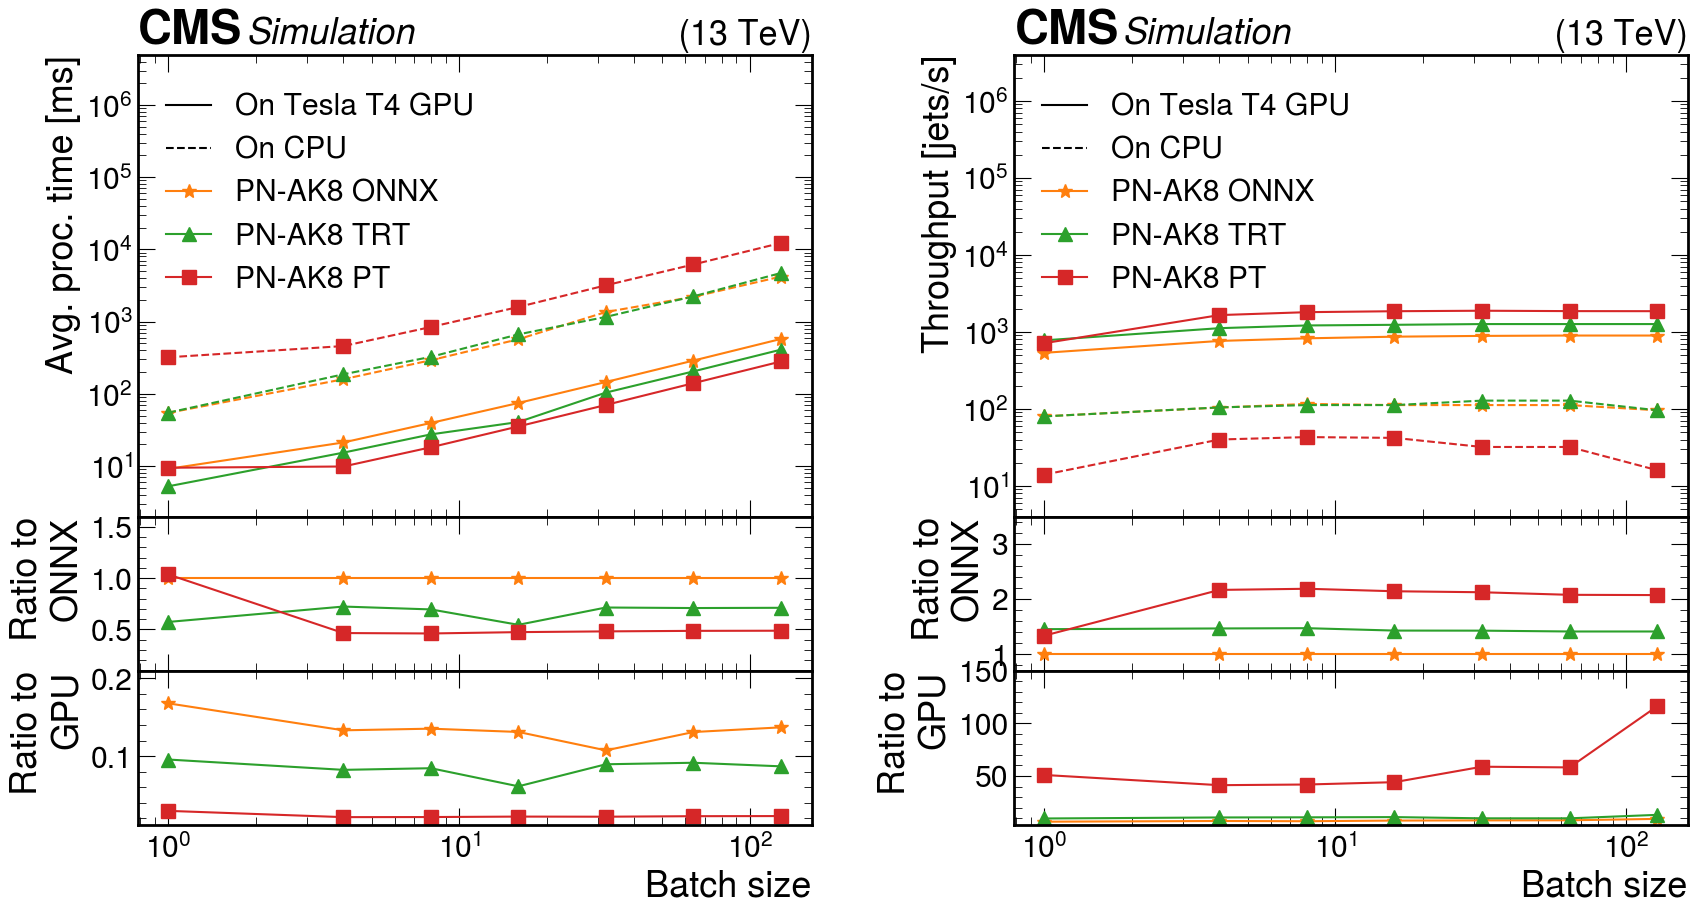

In [3]:
throughputs = OrderedDict()
latencys = OrderedDict()

for model in ['particlenet', 'particlenet_PT', 'particlenet_trt']:
    dirname = f'./explicit_model_file_location/{model}'
    if not os.path.isdir(dirname):
        continue
    throughputs[model] = OrderedDict()
    latencys[model] = OrderedDict()
    throughputs[model+"_CPU"] = OrderedDict()
    latencys[model+"_CPU"] = OrderedDict()

    for batch in [1, 4, 8, 16, 32, 64, 128, 256]:
        fname = f'{dirname}/{model}_batch{batch}.csv'
        #fname = f'{dirname}_CPU_CPU/{model}_batch{batch}.csv'
        if not os.path.isfile(fname):
            continue
        with open (fname, newline='') as csvfile:
            datareader = csv.reader(csvfile)
            for i, row in enumerate(datareader):
                if i!=1:
                    continue
                print(row)
                print(row[0])
            throughputs[model][batch] = float(row[1])
            latencys[model][batch] = float(row[-1])/1.0e3
            
        #fname = f'{dirname}/{model}_batch{batch}.csv'
        fname = f'{dirname}_CPU/{model}_batch{batch}.csv'
        if not os.path.isfile(fname):
            continue
        with open (fname, newline='') as csvfile:
            datareader = csv.reader(csvfile)
            for i, row in enumerate(datareader):
                if i!=1:
                    continue
                print(row)
                print(row[0])
            throughputs[model+"_CPU"][batch] = float(row[1])
            latencys[model+"_CPU"][batch] = float(row[-1])/1.0e3

labels = {
    'particlenet': 'PN-AK8 ONNX',
    'particlenet_PT': 'PN-AK8 PT',
    'particlenet_trt': 'PN-AK8 TRT',
    'particlenet_CPU': 'PN-AK8 ONNX CPU',
    'particlenet_PT_CPU': 'PN-AK8 PT CPU',
    'particlenet_trt_CPU': 'PN-AK8 TRT CPU',
}

markers = ['*', '^', 's', '1']
markers = ['*', '^', 's', '*', '^', 's']
linestyles = ['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed']
linecolors = ['tab:orange', 'tab:green', 'tab:red', 'tab:orange', 'tab:green', 'tab:red']

# make some throughputs and latency plots
def Plot(models, outputname):
    if len(models) == 0:
        return
    model = models[0]
    batchs = np.array(list(throughputs[model].keys()), dtype=np.float32)

    vals_throughput = [np.array(list(throughputs[model].values())) for model in models]
    vals_latency = [np.array(list(latencys[model].values())) for model in models]

    legends = [(labels[model] if("CPU" not in model) else '') for model in models]

    fig, axs = plt.subplots(3,2, figsize=(20,10), gridspec_kw={'height_ratios': [3, 1,1]})
    #axs[0, 0].plot([], [], ' ', label="Tesla T4")

    axs[0, 0].plot([], [], label='On Tesla T4 GPU', color = 'k', linestyle = 'solid')
    axs[0, 0].plot([], [], label='On CPU', color = 'k', linestyle = 'dashed')
    
    axs[0, 1].plot([], [], label='On Tesla T4 GPU', color = 'k', linestyle = 'solid')
    axs[0, 1].plot([], [], label='On CPU', color = 'k', linestyle = 'dashed')
    
    for i, model in enumerate(models):
        axs[0, 0].plot(batchs, vals_latency[i], label=legends[i], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)
        axs[0, 1].plot(batchs, vals_throughput[i],    label=legends[i], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)

    for i, model in enumerate(models):
        if(i > 2):
            break
        axs[1, 0].plot(batchs, vals_latency[i]/vals_latency[0], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)
        axs[1, 1].plot(batchs, vals_throughput[i]/vals_throughput[0], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)

    for i, model in enumerate(models):
        if(i > 2):
            break
        axs[2, 0].plot(batchs, vals_latency[i]/vals_latency[i+3], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)
        axs[2, 1].plot(batchs, vals_throughput[i]/vals_throughput[i+3], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)

        
    axs[2, 0].set_xlabel('Batch size')
    axs[1, 0].set_ylabel('Ratio to\nONNX')
    axs[2, 0].set_ylabel('Ratio to\nGPU')
    axs[1, 0].set_xscale('log')
    axs[0, 0].set_ylabel('Avg. proc. time [ms]')
    axs[0, 0].set_ylim(2,5e6)
    axs[0, 0].set_yscale('log')
    axs[0, 0].set_xticklabels([])
    axs[0, 0].set_xscale('log')
    axs[2, 0].set_xscale('log')
    axs[1, 0].set_ylim(0.1,1.6)
    #axs[0, 0].text(1, 7000, 'Solid line: Tesla T4; Dashed line: CPU', fontsize = 22)
    #axs[0, 0].legend()
    axs[0, 0].legend(loc=[.02,.45])
    axs[2, 0].set_ylim(0.012, 0.21)

    axs[2, 1].set_xlabel('Batch size')
    axs[1, 1].set_ylabel('Ratio to\nONNX')
    axs[2, 1].set_ylabel('Ratio to\nGPU')
    axs[1, 1].set_xscale('log')
    axs[0, 1].set_ylim(4,4e6)
    axs[0, 1].set_ylabel('Throughput [jets/s]')
    axs[0, 1].set_yscale('log')
    axs[0, 1].set_xticklabels([])
    axs[0, 1].set_xscale('log')
    axs[2, 1].set_xscale('log')
    axs[1, 1].set_ylim(0.7,3.5)
    #axs[0, 1].legend()
    axs[0, 1].legend(loc=[.02,.45])
    axs[2, 1].set_ylim(4, 150)

    
    #hep.cms.label(label='Simulation', loc=0)
    if doPAS:
        hep.cms.label(label='Preliminary', loc=0, ax=axs[0,0])
        hep.cms.label(label='Preliminary', loc=0, ax=axs[0,1])
    else:
        hep.cms.label(loc=0, ax=axs[0,0])
        hep.cms.label(loc=0, ax=axs[0,1])
    #hep.cms.lumitext(text='Simulation', ax=None, fontname=None, fontsize=None)
    
    fig.subplots_adjust(hspace=0,wspace=0.3)
    fig.savefig(folder+f"{outputname}.png")
    fig.savefig(folder+f"{outputname}.pdf")
Plot(['particlenet', 'particlenet_trt', 'particlenet_PT', 'particlenet_CPU', 'particlenet_trt_CPU', 'particlenet_PT_CPU'], 'latencies_throughputs_pn_ak8')
#Plot(['particlenet_AK4', 'particlenet_AK4_PT'], 'Test')